In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
DATASET_PATH = "../data/Loan_Default.csv"

## Read dataset

In [63]:
ds = pd.read_csv(DATASET_PATH)

In [64]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))
print('Samples count: ',ds.shape[0])
display(ds.head(5))

columns count -  34 

columns:  ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']
Samples count:  148670


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


## Types of data

In [65]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## Check missing data

In [66]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [67]:
for col in ds.columns:
    if ds[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  loan_limit
Missing data in  approv_in_adv
Missing data in  loan_purpose
Missing data in  rate_of_interest
Missing data in  Interest_rate_spread
Missing data in  Upfront_charges
Missing data in  term
Missing data in  Neg_ammortization
Missing data in  property_value
Missing data in  income
Missing data in  age
Missing data in  submission_of_application
Missing data in  LTV
Missing data in  dtir1


In [68]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(f"{x:<30}{ds[x].isnull().sum():<10}{(ds[x].isnull().sum() / ds.shape[0])*100}%")
        missing.append(x)

loan_limit                    3344      2.2492769220421067%
approv_in_adv                 908       0.6107486379229166%
loan_purpose                  134       0.09013250823972557%
rate_of_interest              36439     24.509988565278807%
Interest_rate_spread          36639     24.64451469697989%
Upfront_charges               39642     26.664424564471652%
term                          41        0.027577856998722002%
Neg_ammortization             121       0.08138830967915517%
property_value                15098     10.15537768211475%
income                        9150      6.154570525324544%
age                           200       0.13452613170108293%
submission_of_application     200       0.13452613170108293%
LTV                           15098     10.15537768211475%
dtir1                         24121     16.224524113809107%


## Unique values count

In [69]:
ds.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

## Distribution statistics

In [70]:
ds.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## Correlation analysis

In [71]:
MAP_OPEN_CREDIT      = {'opc': 1, 'nopc': 0}
MAP_NEG_AMMO         = {'neg_amm': 1, 'not_neg': 0}
MAP_INTEREST_ONLY    = {'int_only': 1, 'not_int': 0}
MAP_LUMP_SUM_PAYMENT = {'lpsm': 1, 'not_lpsm': 0}
MAP_AGE              = {'<25': 0, '25-34': 1, '35-44': 2, '45-54': 3, '55-64': 4, '65-74': 5, '>74': 6 }
MAP_REGION           = {'south':0, 'North': 1, 'central': 2, 'North-East': 3}
MAP_BS_OR_COMM       = {'nob/c': 0, 'b/c': 1}
MAP_OCC_TYPE         = {'pr': 0, 'sr': 1, 'ir': 2}
MAP_SECURED_BY       = {'home': 0, 'land': 1}

In [ ]:
important_df =  ds[['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges',
                    'term', 'property_value', 'LTV', 'Credit_Score', 'income', 'dtir1',
                    'open_credit', 'Neg_ammortization', 'interest_only', 'lump_sum_payment',
                    'age', 'Region', 'business_or_commercial', 'occupancy_type', 'Secured_by',
                    'Status']]

In [73]:
important_df.head(5)

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,LTV,Credit_Score,income,dtir1,open_credit,Neg_ammortization,interest_only,lump_sum_payment,age,Region,business_or_commercial,occupancy_type,Secured_by,Status
0,116500,NaN,NaN,NaN,360.0,118000.0,98.728814,758,1740.0,45.0,nopc,not_neg,not_int,not_lpsm,25-34,south,nob/c,pr,home,1
1,206500,NaN,NaN,NaN,360.0,NaN,NaN,552,4980.0,NaN,nopc,not_neg,not_int,lpsm,55-64,North,b/c,pr,home,1
2,406500,4.56,0.2000,595.0,360.0,508000.0,80.019685,834,9480.0,46.0,nopc,neg_amm,not_int,not_lpsm,35-44,south,nob/c,pr,home,0
3,456500,4.25,0.6810,NaN,360.0,658000.0,69.376900,587,11880.0,42.0,nopc,not_neg,not_int,not_lpsm,45-54,North,nob/c,pr,home,0
4,696500,4.00,0.3042,0.0,360.0,758000.0,91.886544,602,10440.0,39.0,nopc,not_neg,not_int,not_lpsm,25-34,North,nob/c,pr,home,0


In [74]:
important_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amount             148670 non-null  int64  
 1   rate_of_interest        112231 non-null  float64
 2   Interest_rate_spread    112031 non-null  float64
 3   Upfront_charges         109028 non-null  float64
 4   term                    148629 non-null  float64
 5   property_value          133572 non-null  float64
 6   LTV                     133572 non-null  float64
 7   Credit_Score            148670 non-null  int64  
 8   income                  139520 non-null  float64
 9   dtir1                   124549 non-null  float64
 10  open_credit             148670 non-null  object 
 11  Neg_ammortization       148549 non-null  object 
 12  interest_only           148670 non-null  object 
 13  lump_sum_payment        148670 non-null  object 
 14  age                 

In [75]:
columns_to_check = ['open_credit', 'Neg_ammortization', 'interest_only', 
                    'lump_sum_payment', 'age', 'Region', 'business_or_commercial',
                    'occupancy_type', 'Secured_by']

for col in columns_to_check:
    print(f"Unique values in '{col}': {important_df[col].unique()}\n")

Unique values in 'open_credit': ['nopc' 'opc']

Unique values in 'Neg_ammortization': ['not_neg' 'neg_amm' nan]

Unique values in 'interest_only': ['not_int' 'int_only']

Unique values in 'lump_sum_payment': ['not_lpsm' 'lpsm']

Unique values in 'age': ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan]

Unique values in 'Region': ['south' 'North' 'central' 'North-East']

Unique values in 'business_or_commercial': ['nob/c' 'b/c']

Unique values in 'occupancy_type': ['pr' 'sr' 'ir']

Unique values in 'Secured_by': ['home' 'land']



In [ ]:
important_df.loc[:, 'open_credit']            = important_df['open_credit'].map(MAP_OPEN_CREDIT)
important_df.loc[:, 'Neg_ammortization']      = important_df['Neg_ammortization'].map(MAP_NEG_AMMO)
important_df.loc[:, 'interest_only']          = important_df['interest_only'].map(MAP_INTEREST_ONLY)
important_df.loc[:, 'lump_sum_payment']       = important_df['lump_sum_payment'].map(MAP_LUMP_SUM_PAYMENT)
important_df.loc[:, 'age']                    = important_df['age'].map(MAP_AGE)
important_df.loc[:, 'Region']                 = important_df['Region'].map(MAP_REGION)
important_df.loc[:, 'business_or_commercial'] = important_df['business_or_commercial'].map(MAP_BS_OR_COMM)
important_df.loc[:, 'occupancy_type']         = important_df['occupancy_type'].map(MAP_OCC_TYPE)
important_df.loc[:, 'Secured_by']             = important_df['Secured_by'].map(MAP_SECURED_BY)

In [79]:
important_df = important_df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

In [80]:
columns_to_check = ['open_credit', 'Neg_ammortization', 'interest_only', 
                    'lump_sum_payment', 'age', 'Region', 'business_or_commercial',
                    'occupancy_type', 'Secured_by']

for col in columns_to_check:
    print(f"Unique values in '{col}': {important_df[col].unique()}\n")

Unique values in 'open_credit': [0 1]

Unique values in 'Neg_ammortization': [ 0.  1. nan]

Unique values in 'interest_only': [0 1]

Unique values in 'lump_sum_payment': [0 1]

Unique values in 'age': [ 1.  4.  2.  3.  5.  6.  0. nan]

Unique values in 'Region': [0 1 2 3]

Unique values in 'business_or_commercial': [0 1]

Unique values in 'occupancy_type': [0 1 2]

Unique values in 'Secured_by': [0 1]



In [88]:
important_df.head(5)

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,LTV,Credit_Score,income,dtir1,open_credit,Neg_ammortization,interest_only,lump_sum_payment,age,Region,business_or_commercial,occupancy_type,Secured_by,Status
0,116500,NaN,NaN,NaN,360.0,118000.0,98.728814,758,1740.0,45.0,0,0.0,0,0,1.0,0,0,0,0,1
1,206500,NaN,NaN,NaN,360.0,NaN,NaN,552,4980.0,NaN,0,0.0,0,1,4.0,1,1,0,0,1
2,406500,4.56,0.2000,595.0,360.0,508000.0,80.019685,834,9480.0,46.0,0,1.0,0,0,2.0,0,0,0,0,0
3,456500,4.25,0.6810,NaN,360.0,658000.0,69.376900,587,11880.0,42.0,0,0.0,0,0,3.0,1,0,0,0,0
4,696500,4.00,0.3042,0.0,360.0,758000.0,91.886544,602,10440.0,39.0,0,0.0,0,0,1.0,1,0,0,0,0


In [81]:
important_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amount             148670 non-null  int64  
 1   rate_of_interest        112231 non-null  float64
 2   Interest_rate_spread    112031 non-null  float64
 3   Upfront_charges         109028 non-null  float64
 4   term                    148629 non-null  float64
 5   property_value          133572 non-null  float64
 6   LTV                     133572 non-null  float64
 7   Credit_Score            148670 non-null  int64  
 8   income                  139520 non-null  float64
 9   dtir1                   124549 non-null  float64
 10  open_credit             148670 non-null  int64  
 11  Neg_ammortization       148549 non-null  float64
 12  interest_only           148670 non-null  int64  
 13  lump_sum_payment        148670 non-null  int64  
 14  age                 

In [87]:
missing = list()
for x in important_df.columns:
    if important_df[x].isnull().sum() != 0:
        print(f"{x:<30}{important_df[x].isnull().sum():<10}{(important_df[x].isnull().sum() / important_df.shape[0])*100}%")
        missing.append(x)

rate_of_interest              36439     24.509988565278807%
Interest_rate_spread          36639     24.64451469697989%
Upfront_charges               39642     26.664424564471652%
term                          41        0.027577856998722002%
property_value                15098     10.15537768211475%
LTV                           15098     10.15537768211475%
income                        9150      6.154570525324544%
dtir1                         24121     16.224524113809107%
Neg_ammortization             121       0.08138830967915517%
age                           200       0.13452613170108293%


In [85]:
corr_matrix = important_df.corr()
print(corr_matrix['Status'].sort_values(ascending=False))

Status                    1.000000
lump_sum_payment          0.187752
Neg_ammortization         0.155920
business_or_commercial    0.092550
dtir1                     0.078083
age                       0.044600
LTV                       0.038895
occupancy_type            0.029777
Secured_by                0.026055
rate_of_interest          0.022957
interest_only             0.013881
Credit_Score              0.004004
term                     -0.000240
open_credit              -0.009979
Upfront_charges          -0.019138
Region                   -0.021720
loan_amount              -0.036825
property_value           -0.048864
income                   -0.065119
Interest_rate_spread           NaN
Name: Status, dtype: float64


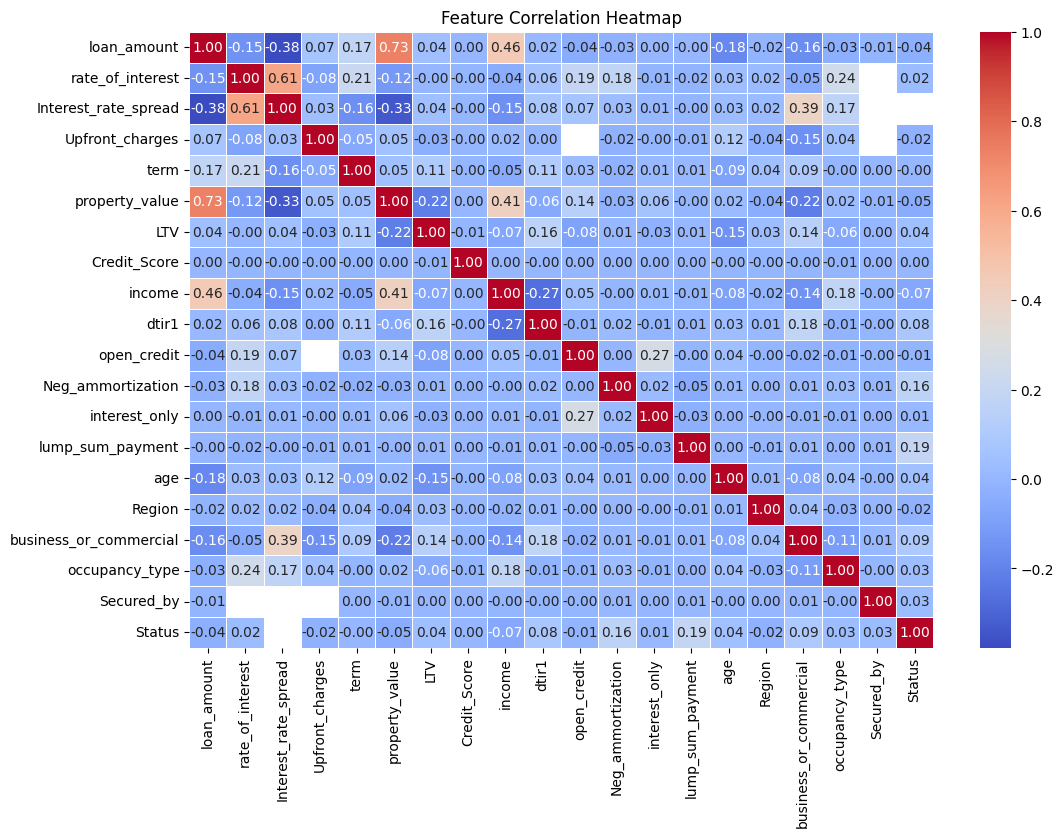

In [86]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [89]:
important_df.drop(columns=['LTV', 'dtir1', 'Interest_rate_spread'], inplace=True)

In [90]:
important_df.head(5)

,loan_amount,rate_of_interest,Upfront_charges,term,property_value,Credit_Score,income,open_credit,Neg_ammortization,interest_only,lump_sum_payment,age,Region,business_or_commercial,occupancy_type,Secured_by,Status
0,116500,NaN,NaN,360.0,118000.0,758,1740.0,0,0.0,0,0,1.0,0,0,0,0,1
1,206500,NaN,NaN,360.0,NaN,552,4980.0,0,0.0,0,1,4.0,1,1,0,0,1
2,406500,4.56,595.0,360.0,508000.0,834,9480.0,0,1.0,0,0,2.0,0,0,0,0,0
3,456500,4.25,NaN,360.0,658000.0,587,11880.0,0,0.0,0,0,3.0,1,0,0,0,0
4,696500,4.00,0.0,360.0,758000.0,602,10440.0,0,0.0,0,0,1.0,1,0,0,0,0


In [ ]:
missing = list()
for x in important_df.columns:
    if important_df[x].isnull().sum() != 0:
        print(f"{x:<30}{important_df[x].isnull().sum():<10}{(important_df[x].isnull().sum() / important_df.shape[0])*100}%")
        missing.append(x)

rate_of_interest              36439     24.509988565278807%
Upfront_charges               39642     26.664424564471652%
term                          41        0.027577856998722002%
property_value                15098     10.15537768211475%
income                        9150      6.154570525324544%
Neg_ammortization             121       0.08138830967915517%
age                           200       0.13452613170108293%
